# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

![title](tabelas.png)

In [17]:
# Passo 3: Extração/Obtenção de Dados
import pandas as pd
tabela = pd.read_csv("barcos_ref.csv")
display(tabela)
# Passo 4: Ajuste de Dados (Tratamento/Limpeza)
print(tabela.info())
# Não precisa de tratamento/limpeza

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


Preco          1.000000
TipoBarco      0.293137
TipoVenda      0.041266
Ano            0.113385
Comprimento    0.578353
Largura        0.557621
Material      -0.036476
Name: Preco, dtype: float64


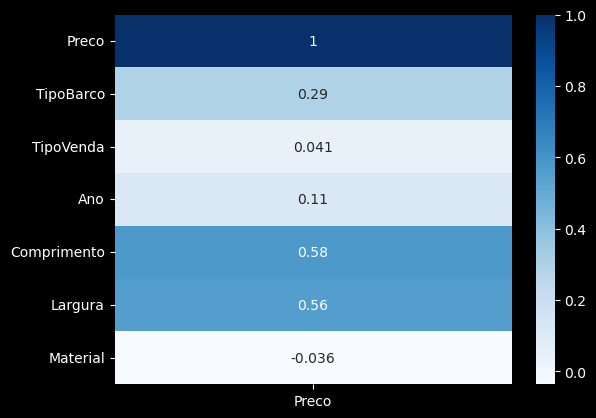

In [18]:
# Passo 5: Análise Exploratória
#Correlação do Preço com as demais colunas da tabela, índice de -1 a 1
print(tabela.corr()["Preco"])

# Opcional
import seaborn as sns
import matplotlib.pyplot as ptl

sns.heatmap(tabela.corr()[["Preco"]], cmap='Blues', annot=True)
ptl.show()

In [19]:
# Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
from sklearn.model_selection import train_test_split

# Dividir as informações em y meu objetivo e x as caracteristicas
y = tabela["Preco"]
x = tabela.drop("Preco", axis=1)

# Dividir o treino e o testa para a IA, definindo o tamanho do teste em % e treinando 1 vez
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state=1)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criar as IAs
modelo_regressaoLinear = LinearRegression()
modelo_arvoreDecisao = RandomForestRegressor()

# Treinar as IAs
modelo_regressaoLinear.fit(x_treino, y_treino)
modelo_arvoreDecisao.fit(x_treino, y_treino)

from sklearn import metrics

# Criar as previsões
previsao_regressaoLinear = modelo_regressaoLinear.predict(x_teste)
previsao_arvoreDecisao = modelo_arvoreDecisao.predict(x_teste)

# Comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaoLinear))
print(metrics.r2_score(y_teste, previsao_arvoreDecisao))

0.4490324760735812
0.8589078009597648


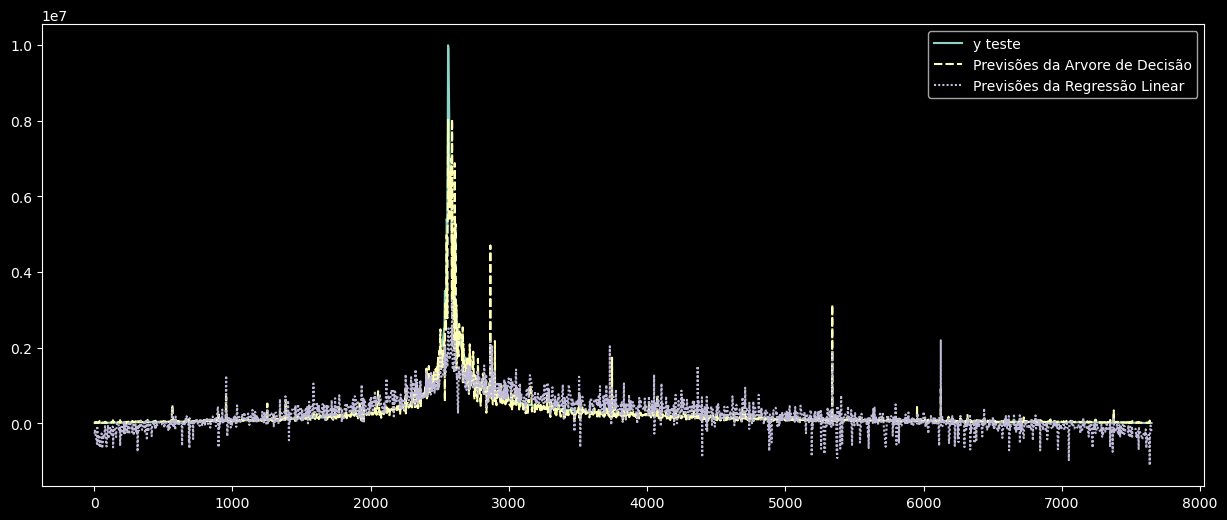

In [24]:
# Passo 7: Interpretação de Resultados
# Criar uma tabela com os resultados
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y teste"] = y_teste
tabela_auxiliar["Previsões da Arvore de Decisão"] = previsao_arvoreDecisao
tabela_auxiliar["Previsões da Regressão Linear"] = previsao_regressaoLinear

# Criar um gráfico com os resultados
plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [36]:
# Previsão de Preços com atualização pequena do banco de dados, não precisa treinar a IA de novo
# Importar novos dados
nova_tabela = pd.read_csv("novos_barcos.csv")
display(nova_tabela)
previsao = modelo_arvoreDecisao.predict(nova_tabela)
print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 5837.2982619  8695.98      18921.2      ]
